# Intro

This notebook performs experiments on 2-neuron spiking oscillators to determine stability, nature of settling phases, and rate of convergence

# Import dependencies

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import math

# Upload modules for 
1. NeuronLayerx
2. NeuronNetwork classes and
3. Simulation function


In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving functions_sim.py to functions_sim.py
Saving neuron_layer.py to neuron_layer.py
Saving neuron_network.py to neuron_network.py
functions_sim.py has been uploaded, with length 1945
neuron_layer.py has been uploaded, with length 13025
neuron_network.py has been uploaded, with length 4425


# Import classes

In [ ]:
from neuron_layer import NeuronLayerX
from neuron_network import NeuronNetwork
from functions_sim import run_simulation

Design the synaptic current waveform

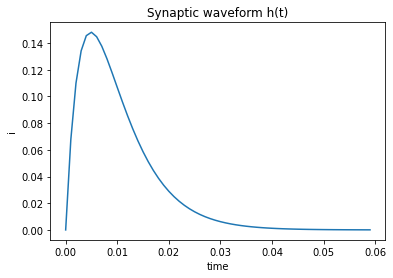

In [ ]:
dt = 1e-3
tau1 = 6e-3 # in ms
tau2 = 4e-3
duration = 10*max(tau1, tau2) # 10 times the longest time constant
t = np.arange(0, duration, dt)
synaptic_waveform = np.exp(-t/tau1)-np.exp(-t/tau2)
plt.plot(t, synaptic_waveform)
plt.xlabel("time")
plt.ylabel("i")
plt.title("Synaptic waveform h(t)")
plt.show()

Testing done- the framework is set

# Experiment 1: How do initial conditions affect the settling phase?

In [ ]:
import warnings

def settling_phase(spike1, spike2):
  spike_times1 = np.argwhere(spike1)
  spike_times2 = np.argwhere(spike2)
  if spike_times1.size>0 and spike_times2.size>0:
    T1 = spike_times1[-1]-spike_times1[-2]
    T2 = spike_times2[-1]-spike_times2[-2]
    assert np.abs(T1-T2)<=2
    T = T1
    delT_12 = np.abs(spike_times1[-1]-spike_times2[-1])
    delphi_raw = (delT_12/T)*360 # in degrees
    delphi = min(delphi_raw, 360-delphi_raw)
  else:
    warnings.warn("Warning: Some neurons don't spike: phase difference used =-100")
    delphi = -100
  return delphi


In [ ]:
import matplotlib.animation as animation 
from matplotlib import rc
rc('animation', html='jshtml')

def phase_plot(v):
  plt.style.use('dark_background')

  fig = plt.figure() 
  ax = plt.axes(xlim=(0, 1), ylim=(0, 1)) 
  line, = ax.plot([], [], lw=2) 

  # initialization function 
  def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

  # lists to store x and y axis points 
  xdata, ydata = [], [] 

  # animation function 
  def animate(i): 
    
    # appending new points to x, y axes points list 
    xdata.append(v[i,0]) 
    ydata.append(v[i,1]) 
    line.set_data(xdata, ydata) 
    return line, 
    
  # setting a title for the plot 
  plt.title('Phase space') 
  plt.xlabel('v_1')
  plt.ylabel('v_2')
  # hiding the axis details 
  plt.axis('on') 

  # call the animator	 
  anim = animation.FuncAnimation(fig, animate, init_func=init, 
                frames=500, interval=20, blit=True) 
  # plt.show()
  return anim


Use grid of initial conditions and obtain the settling phase

In [ ]:
def v_init_sweep(v_values, w_cr, w_se, iext, syn_wav):
  n_neurons=2
  n_steps = 500
  n_v = len(v_values)
  # v_values = np.linspace(0, 0.5, n_v) 
  phi_all = np.zeros((n_v, n_v))
  for m in range(n_v):
    for k in range(n_v):
      v_init = np.array([v_values[m], v_values[k]]).reshape((2,1))
      outputs  = run_simulation(w_cross=w_cr, w_self=w_se, i_ext_mag=iext,synaptic_waveform=syn_wav, num_steps=n_steps, num_neurons=n_neurons, v_initial=v_init)
      v,s  = outputs['voltage'], outputs['spike']
      phi = settling_phase(s[:,0], s[:,1])
      phi_all[m,k] = phi
  return phi_all

In [ ]:
def plot_phase(phi_mat, axis_limits, x_name, y_name, plot_title):
  plt.imshow(phi_mat, extent=axis_limits, origin='lower', cmap='cividis')
  plt.colorbar()
  plt.title(plot_title)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  plt.show()

In [ ]:
v_all = [0, 0.1, 0.3, 0.5]
w_values = -np.linspace(0, 10, 20)

In [ ]:
vth= 0.61

In [ ]:
i_ext_mag=0.9

In [ ]:
# n_w = len(w_values)
# i_ext_mag = 0.9
# v_init = np.array([v_all[0], v_all[2]]).reshape((2,1))
# plt_ttl = "phi_ss for init_phase=("+ str(360*v_init[0,0]/vth)+"," +str(360*v_init[1,0]/vth)+")"
# phi_all = w_sweep(w_values,v_init, i_ext_mag, synaptic_waveform)
# plot_phase(phi_all, [0, min(w_values), 0, min(w_values)], 'w_self', 'w_cross', plt_ttl)

In [ ]:
w_all=[0, -1, -3, -5]

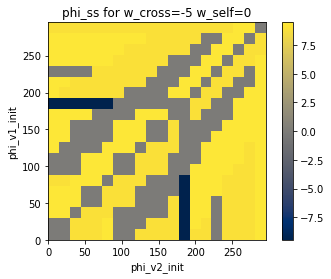

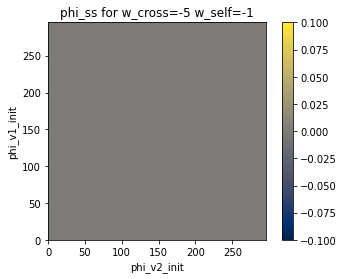

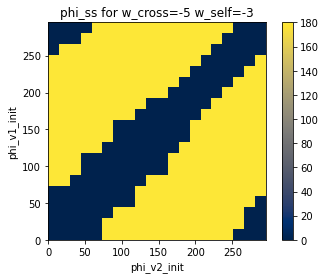

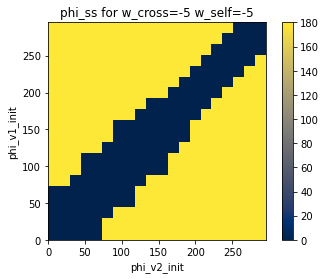

In [ ]:
for i in range(len(w_all)):
  n_v = 20
  v_values = np.linspace(0, 0.5, n_v)
  w_cross = -5
  w_self = w_all[i]
  i_ext_mag = 0.9
  plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
  phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, synaptic_waveform)
  plot_phase(phi_all, [0, max(v_values)*360/vth, 0, max(v_values)*360/vth], 'phi_v2_init', 'phi_v1_init', plt_ttl)

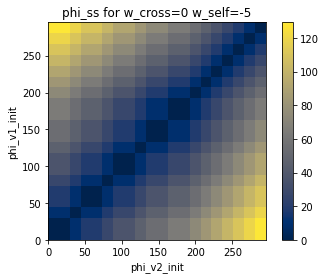

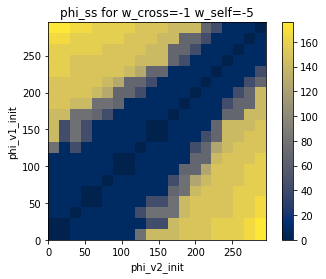

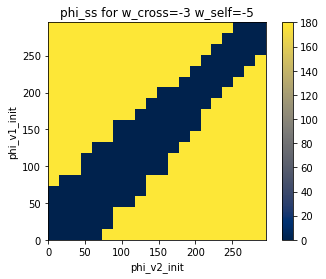

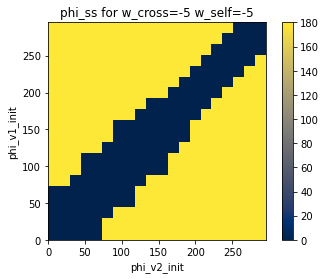

In [ ]:
for i in range(len(w_all)):
  n_v = 20
  v_values = np.linspace(0, 0.5, n_v)
  w_cross = w_all[i]
  w_self = -5
  i_ext_mag = 0.9
  plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
  phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, synaptic_waveform)
  plot_phase(phi_all, [0, max(v_values)*360/vth, 0, max(v_values)*360/vth], 'phi_v2_init', 'phi_v1_init', plt_ttl)

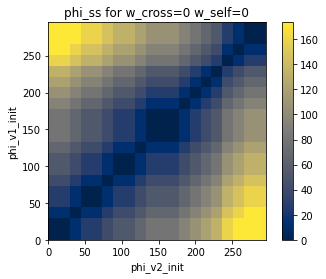

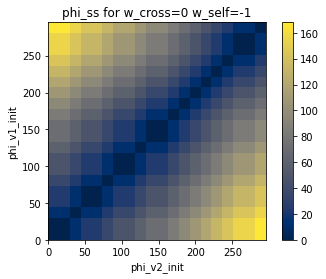

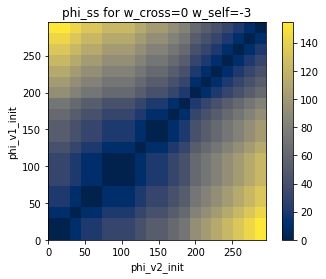

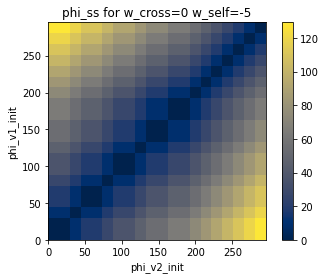

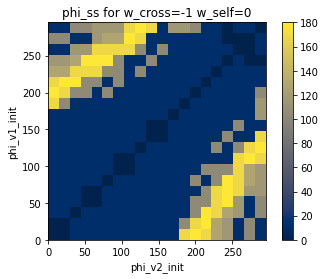

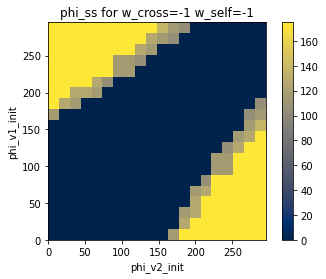

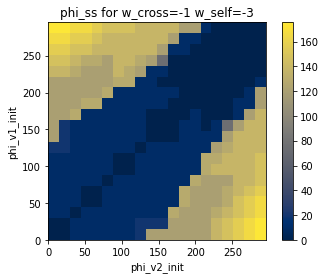

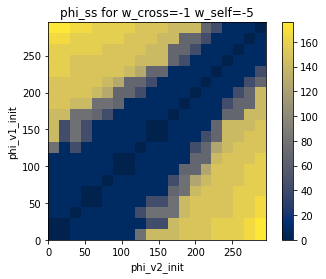

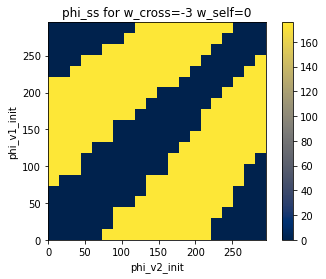

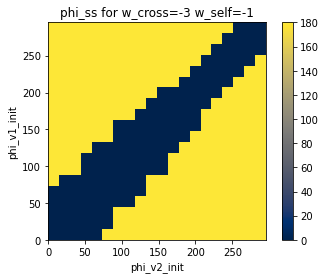

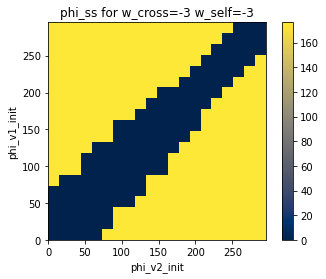

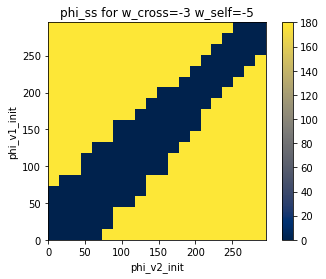

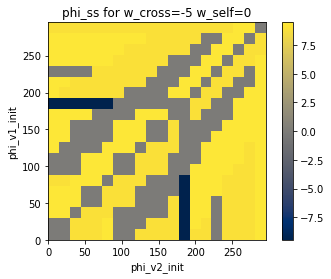

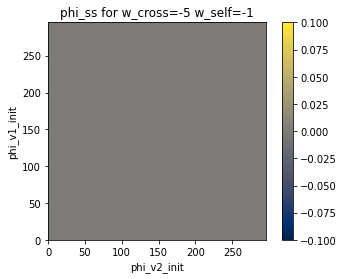

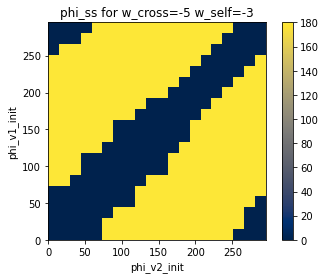

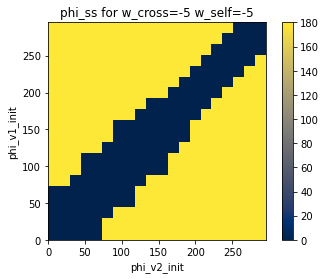

In [ ]:
for i in range(len(w_all)):
  for j in range(len(w_all)):
    n_v = 20
    v_values = np.linspace(0, 0.5, n_v)
    w_cross = w_all[i]
    w_self = w_all[j]
    i_ext_mag = 0.9
    plt_ttl = "phi_ss for w_cross="+ str(w_cross) +" w_self="+ str(w_self)
    phi_all = v_init_sweep(v_values, w_cross, w_self, i_ext_mag, synaptic_waveform)
    plot_phase(phi_all, [0, max(v_values)*360/vth, 0, max(v_values)*360/vth], 'phi_v2_init', 'phi_v1_init', plt_ttl)


In [ ]:
# x = np.linspace(0, 0.5, n_v)
# y = np.linspace(0, 0.5, n_v)
# # v1, v2 = np.meshgrid(x, y)
# plt.contour(x, y,phi_all, levels=len(np.unique(phi_all)))
# plt.title("Settling phase for different V_initial")
# plt.xlabel("v_1")
# plt.ylabel("v_2")
# plt.colorbar()
# plt.show()

# Experiment 2: Vary connectivity parameters to achieve different settling phase values

Case 1: v1=v2 (initial conditions identical)

In [ ]:
n_w = 20 # 10 different weight values
w_values = -np.linspace(0, 10, n_w) 
phi_all_w = np.zeros((n_w, n_w))
i_ext_mag=0.9
n_steps = 500
n_neurons=2
for a in range(n_w):
  for b in range(n_w):
    v_init = np.zeros((2,1)) 
    w_crossx = w_values[a]
    w_selfx = w_values[b]
    outputs = run_simulation(w_crossx, w_selfx, i_ext_mag, synaptic_waveform, n_steps, n_neurons,v_init)
    v,s  = outputs['voltage'], outputs['spike']
    phi = settling_phase(s[:,0], s[:,1])
    phi_all_w[a,b] = phi

In [ ]:
np.unique(phi_all_w)

array([0.])

Text(0.5, 1.0, 'Settling phase- diff w, same vi')

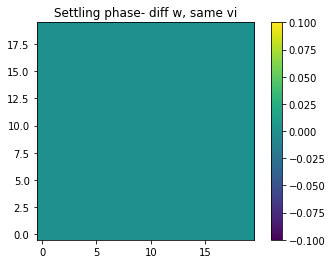

In [ ]:
plt.imshow(phi_all_w, origin='lower')
plt.colorbar()
plt.title("Settling phase- diff w, same vi")

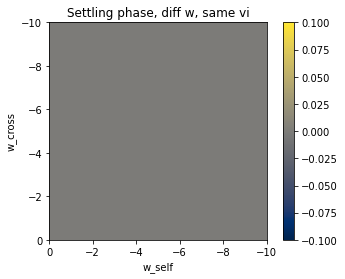

In [ ]:
plot_phase(phi_all_w, [0, min(w_values), 0, min(w_values)],'w_self', 'w_cross', "Settling phase, diff w, same vi")

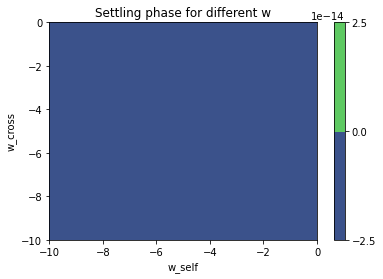

In [ ]:
x = -np.linspace(0, 10, n_w)
y = -np.linspace(0, 10, n_w)
# v1, v2 = np.meshgrid(x, y)
plt.contourf(x, y, np.squeeze(phi_all_w))
plt.title("Settling phase for different w")
plt.xlabel("w_self")
plt.ylabel("w_cross")
plt.colorbar()
plt.show()

Case 2: Slightly different initial conditions

In [ ]:
n_w = 20 # 10 different weight values
w_values = -np.linspace(0, 5, n_w) 
phi_all_w2 = np.zeros((n_w, n_w))
n_steps = 500
for a in range(n_w):
  for b in range(n_w):
    v_init = np.array([0.1, 0.2]).reshape((2, 1)) 
    w_crossx = w_values[a]
    w_selfx = w_values[b]
    print(f"w_cross={w_crossx}, w_self={w_selfx}")
    outputs = run_simulation(w_crossx, w_selfx, i_ext_mag, synaptic_waveform, n_steps, n_neurons,v_init)
    v,s  = outputs['voltage'], outputs['spike']
    phi = settling_phase(s[:,0], s[:,1])
    phi_all_w2[a,b] = phi

w_cross=-0.0, w_self=-0.0
w_cross=-0.0, w_self=-0.2631578947368421
w_cross=-0.0, w_self=-0.5263157894736842
w_cross=-0.0, w_self=-0.7894736842105263
w_cross=-0.0, w_self=-1.0526315789473684
w_cross=-0.0, w_self=-1.3157894736842104
w_cross=-0.0, w_self=-1.5789473684210527
w_cross=-0.0, w_self=-1.8421052631578947
w_cross=-0.0, w_self=-2.1052631578947367
w_cross=-0.0, w_self=-2.3684210526315788
w_cross=-0.0, w_self=-2.631578947368421
w_cross=-0.0, w_self=-2.894736842105263
w_cross=-0.0, w_self=-3.1578947368421053
w_cross=-0.0, w_self=-3.4210526315789473
w_cross=-0.0, w_self=-3.6842105263157894
w_cross=-0.0, w_self=-3.9473684210526314
w_cross=-0.0, w_self=-4.2105263157894735
w_cross=-0.0, w_self=-4.473684210526316
w_cross=-0.0, w_self=-4.7368421052631575
w_cross=-0.0, w_self=-5.0
w_cross=-0.2631578947368421, w_self=-0.0
w_cross=-0.2631578947368421, w_self=-0.2631578947368421
w_cross=-0.2631578947368421, w_self=-0.5263157894736842
w_cross=-0.2631578947368421, w_self=-0.7894736842105263
w_cr

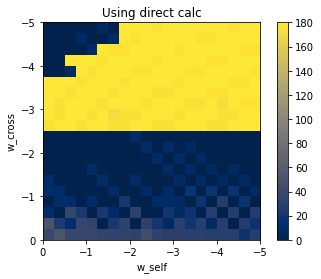

In [ ]:
plot_phase(phi_all_w2, [0, min(w_values), 0, min(w_values)], 'w_self', 'w_cross',"Using direct calc")

In [ ]:
v_i = np.zeros((2,1))
print(v_i)
run_simulation(-5, -5, 0.9, synaptic_waveform, 100, 2, v_i)
print(v_i)

[[0.]
 [0.]]
[[0.]
 [0.]]


In [ ]:
def w_sweep(w_values, v_init, i_ext_mag, synaptic_waveform):
  n_w = len(w_values) # 10 different weight values
  n_neurons=2
  # w_values = -np.linspace(0, 5, n_w) 
  phi_all = np.zeros((n_w, n_w))
  n_steps = 500
  # v_0 = np.array([0.1, 0.2]).reshape((2, 1))
  for a in range(n_w):
    for b in range(n_w):
      w_c = w_values[a]
      w_s = w_values[b]
      # print(f"w_cross={w_c}, w_self={w_s}, v_init={v_0}")  
      outputs = run_simulation(w_c, w_s, i_ext_mag, synaptic_waveform, n_steps, n_neurons,v_0)
      v,s  = outputs['voltage'], outputs['spike']
      phi = settling_phase(s[:,0], s[:,1])
      phi_all[a,b] = phi
  return phi_all
  # n_w = 20 # 10 different weight values
  # w_values = -np.linspace(0, 5, n_w) 
  # n_neurons=2
  # phi_all = np.zeros((n_w, n_w))
  # n_steps = 500
  # v_init = np.array([0.1, 0.2]).reshape((2, 1))
  # for a in range(n_w):
  #   for b in range(n_w): 
  #     w_crossx = w_values[a]
  #     w_selfx = w_values[b]
  #     print(f"w_cross={w_crossx}, w_self={w_selfx}")
  #     outputs = run_simulation(w_crossx, w_selfx, iext, syn_wav, n_steps, n_neurons,v_init)
  #     v,s  = outputs['voltage'], outputs['spike']
  #     phi = settling_phase(s[:,0], s[:,1])
  #     phi_all[a,b] = phi
  # return phi_all
  # n_neurons=2
  # w_values =-np.linspace(0,5,20)
  # n_steps = 500
  # n_w = 20
  # phi_all = np.zeros((n_w, n_w))
  # for m in range(n_w):
  #   for k in range(n_w):
  #     w_cr = w_values[m]
  #     w_se = w_values[k]
  #     outputs  = run_simulation(w_cr,w_se,iext,syn_wav,n_steps,n_neurons,v_init)
  #     v,s  = outputs['voltage'], outputs['spike']
  #     phi = settling_phase(s[:,0], s[:,1])
  #     phi_all[m,k] = phi
  # return phi_all

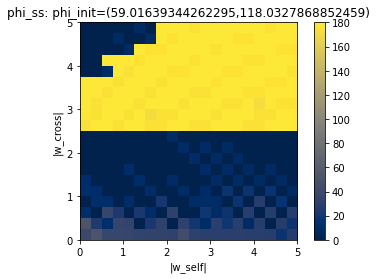

In [ ]:
phi_w2_funct = w_sweep(w_values,np.array([0.1, 0.2]).reshape((2, 1)),i_ext_mag, synaptic_waveform)
plot_phase(phi_w2_funct, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], '|w_self|', '|w_cross|',"phi_ss: phi_init=("+str(0.1*360/vth)+","+str(0.2*360/vth)+")")

In [ ]:
v_0_all = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
w_values

array([-0.        , -0.26315789, -0.52631579, -0.78947368, -1.05263158,
       -1.31578947, -1.57894737, -1.84210526, -2.10526316, -2.36842105,
       -2.63157895, -2.89473684, -3.15789474, -3.42105263, -3.68421053,
       -3.94736842, -4.21052632, -4.47368421, -4.73684211, -5.        ])

In [ ]:
a = np.array([0.1, 0.2]).reshape((2,1))
print(str(np.floor(360*a[0]/vth)))
print(str(np.floor(360*a[1]/vth)))

[59.]
[118.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Warning: Some neurons don't spike: phase difference used =-100
  from ipykernel import kernelapp as app


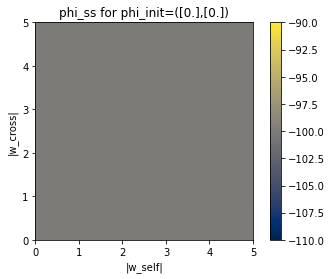

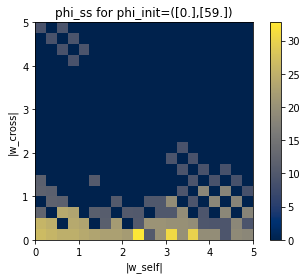

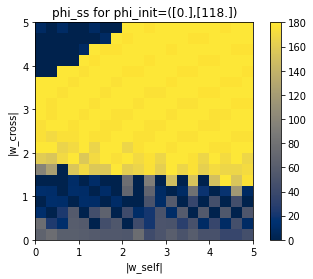

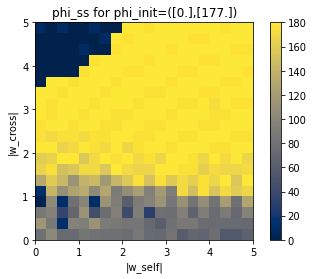

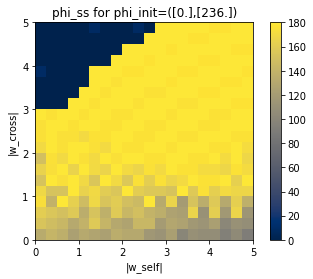

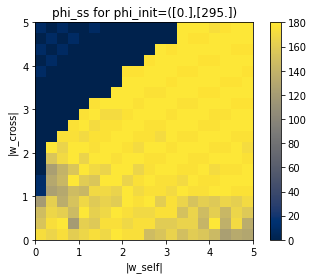

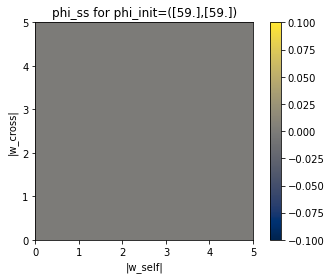

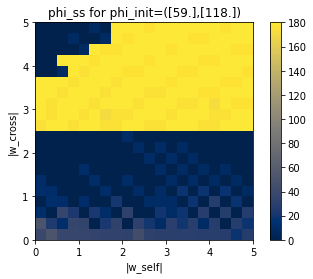

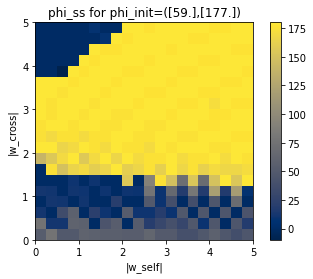

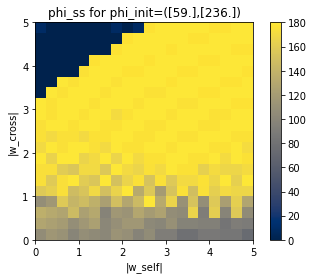

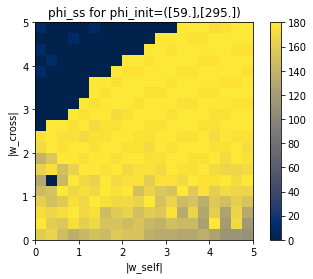

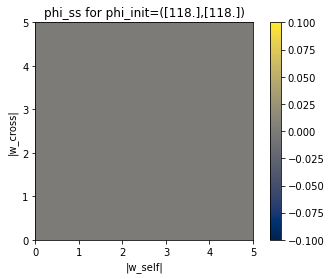

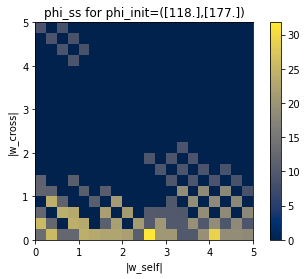

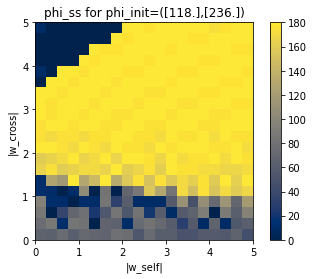

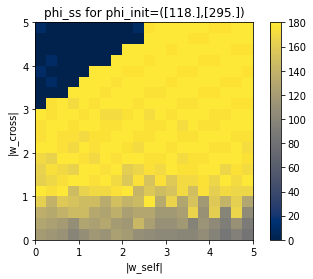

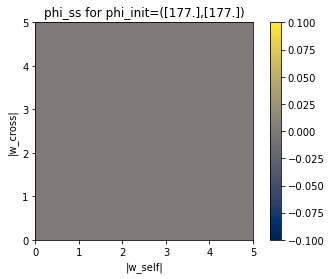

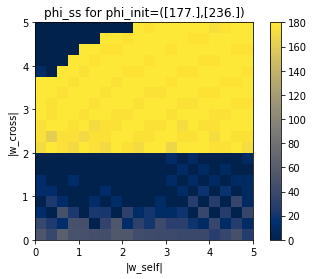

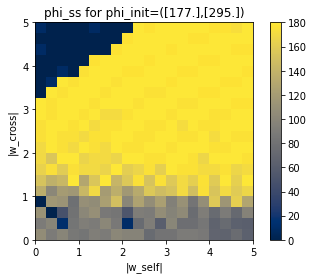

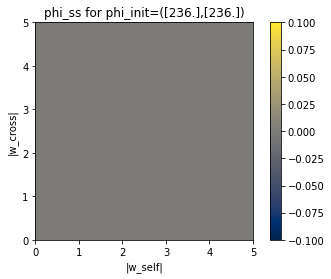

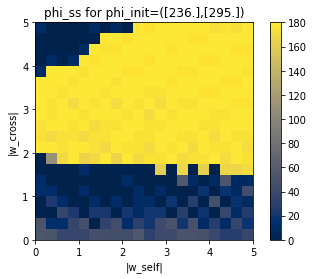

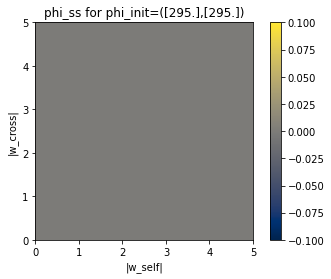

In [ ]:
for i in range(len(v_0_all)):
  for j in range(len(v_0_all)):
    if i<=j:
      v_0 = np.array([v_0_all[i], v_0_all[j]]).reshape((2,1))
      phi_w = w_sweep(w_values,v_0, i_ext_mag,synaptic_waveform)
      plot_phase(phi_w, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], "|w_self|","|w_cross|","phi_ss for phi_init=("+str(np.floor(360*v_0[0]/vth))+","+str(np.floor(360*v_0[1]/vth))+")")

Plot transpose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Warning: Some neurons don't spike: phase difference used =-100
  from ipykernel import kernelapp as app


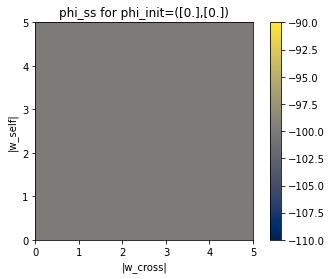

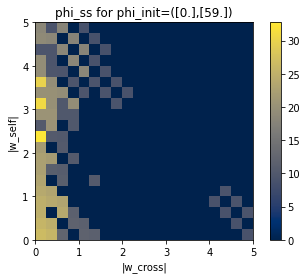

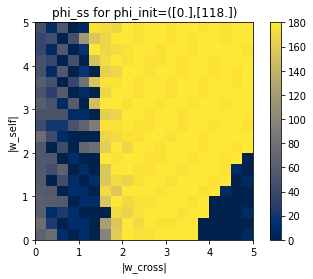

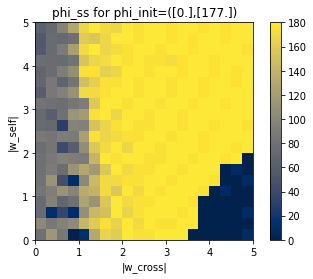

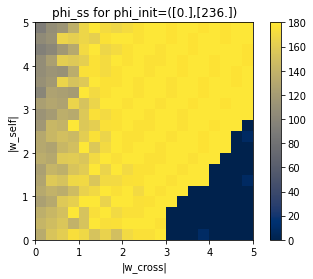

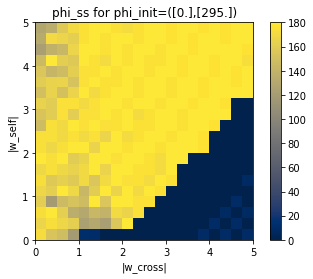

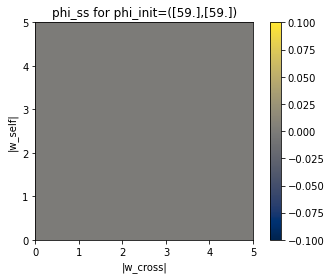

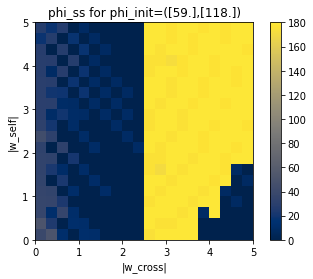

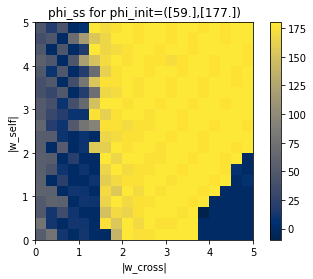

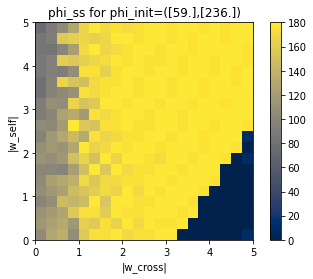

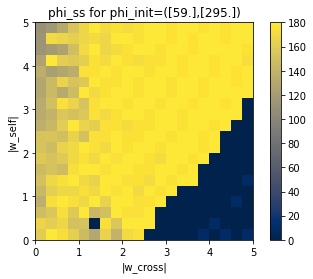

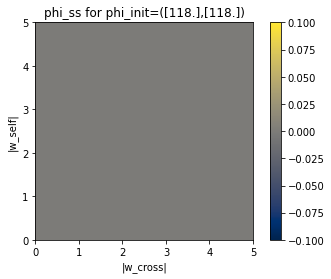

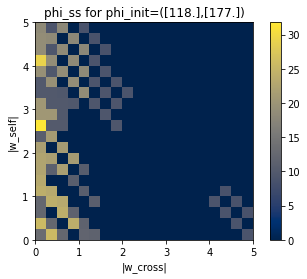

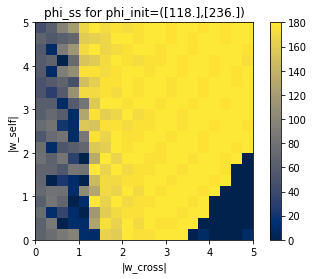

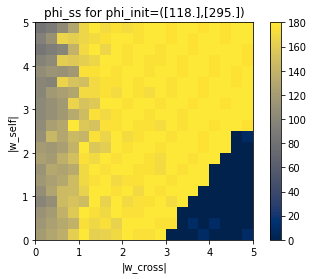

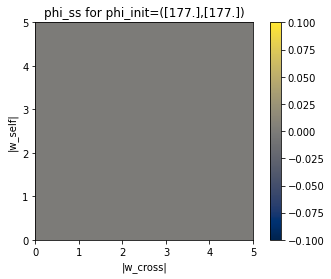

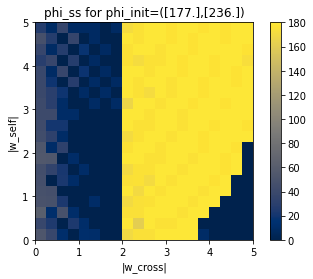

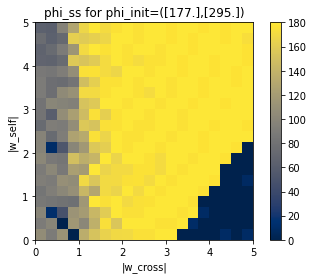

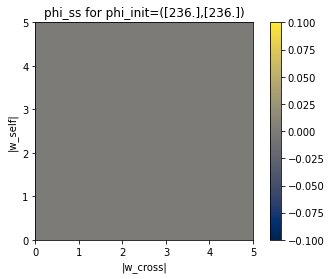

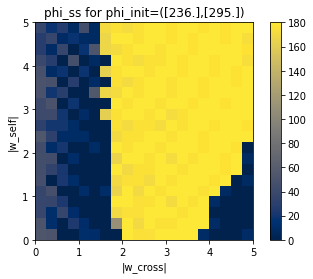

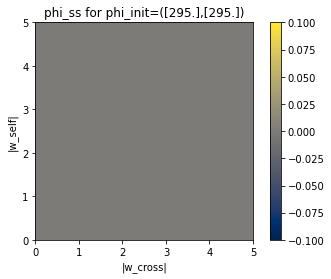

In [ ]:
for i in range(len(v_0_all)):
  for j in range(len(v_0_all)):
    if i<=j:
      v_0 = np.array([v_0_all[i], v_0_all[j]]).reshape((2,1))
      phi_w = w_sweep(w_values,v_0, i_ext_mag,synaptic_waveform)
      plot_phase(phi_w.T, [0, max(np.abs(w_values)), 0, max(np.abs(w_values))], "|w_cross|","|w_self|","phi_ss for phi_init=("+str(np.floor(360*v_0[0]/vth))+","+str(np.floor(360*v_0[1]/vth))+")")

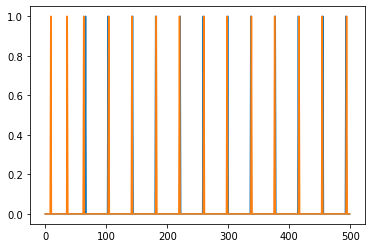

In [ ]:
w_self= 0
w_cross = -5

out= run_simulation(w_cross, w_self, i_ext_mag, synaptic_waveform, n_steps, n_neurons, v_initial=np.array([0, 0.5]).reshape((2,1)))

v,s = out['voltage'], out['spike']
plt.plot(s[:,0])
plt.plot(s[:,1])

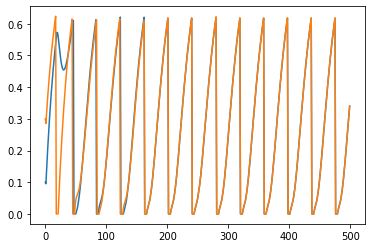

In [ ]:
plt.plot(v[:,0])
plt.plot(v[:,1])

In [ ]:
np.unique(phi_all_w2)

array([  0.        ,   8.57142857,   8.7804878 ,   9.        ,
         9.23076923,   9.47368421,   9.72972973,  10.        ,
        10.28571429,  10.58823529,  10.90909091,  11.25      ,
        11.61290323,  12.        ,  12.4137931 ,  18.        ,
        18.46153846,  18.94736842,  19.45945946,  20.        ,
        20.57142857,  21.17647059,  22.5       ,  23.22580645,
        24.82758621,  27.        ,  27.69230769,  28.42105263,
        29.18918919,  30.        ,  30.85714286,  31.76470588,
        32.72727273,  33.75      ,  34.83870968,  36.        ,
        37.24137931,  40.        ,  43.63636364,  51.42857143,
       172.17391304, 173.07692308, 175.6097561 , 175.81395349,
       176.        , 176.17021277, 176.17021277, 176.32653061,
       176.47058824, 176.47058824, 176.60377358, 176.72727273,
       176.72727273, 176.84210526, 176.94915254, 177.04918033,
       180.        ])

Text(0, 0.5, '|w_cross|')

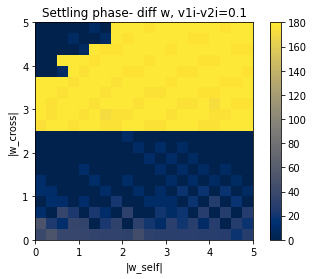

In [ ]:
plt.imshow(phi_all_w2, origin='lower',extent=[0, max(np.abs(w_values)), 0, max(abs(w_values))], cmap='cividis')
plt.colorbar()
plt.title("Settling phase- diff w, v1i-v2i=0.1")
plt.xlabel('|w_self|')
plt.ylabel("|w_cross|")


w_cross=-0.0, w_self=-0.0, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-0.2631578947368421, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-0.5263157894736842, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-0.7894736842105263, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-1.0526315789473684, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-1.3157894736842104, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-1.5789473684210527, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-1.8421052631578947, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-2.1052631578947367, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-2.3684210526315788, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-2.631578947368421, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-2.894736842105263, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-3.1578947368421053, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-3.4210526315789473, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-3.6842105263157894, v_init=[[0.1]
 [0.2]]
w_cross=-0.0, w_self=-3.9473684210526314, v_init=[[0.1]
 

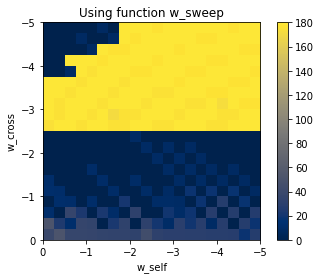

In [ ]:
phi_w2_funct = w_sweep(w_values,np.array([0.1, 0.2]).reshape((2, 1)),i_ext_mag, synaptic_waveform)
plot_phase(phi_w2_funct, [0, min(w_values), 0, min(w_values)], 'w_self', 'w_cross',"Using function w_sweep")

The function w_sweep is NOT working, reason unknown.

Use direct calculation for now- to get dependence of settling phase on weights

In [ ]:
phi_all_w2==phi_w2_funct

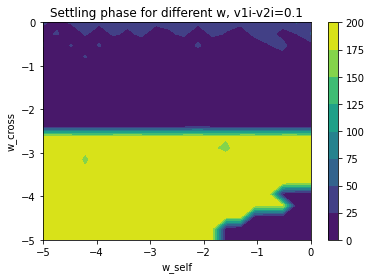

In [ ]:
x = -np.linspace(0, 5, n_w)
y = -np.linspace(0, 5, n_w)
# v1, v2 = np.meshgrid(x, y)
plt.contourf(x, y, np.squeeze(phi_all_w2), origin='lower')
plt.title("Settling phase for different w, v1i-v2i=0.1")
plt.xlabel("w_self")
plt.ylabel("w_cross")
plt.colorbar()
plt.show()

Case 3: Largely different initial voltages: v1i=0.01, v2i=0.4

In [ ]:
w_crossx

In [ ]:
np.unique(phi_all_w3)

In [ ]:
plt.imshow(phi_all_w3, origin='lower')
plt.colorbar()
plt.title("Settling phase- diff w, v2i-v1i=0.39")

In [ ]:
x = -np.linspace(0, 10, n_w)
y = -np.linspace(0, 10, n_w)
# v1, v2 = np.meshgrid(x, y)
plt.contourf(x, y, np.squeeze(phi_all_w3), origin='lower')
plt.title("Settling phase for different w, v1i-v2i=0.4")
plt.xlabel("w_self")
plt.ylabel("w_cross")
plt.colorbar()
plt.show()

Case 4: very small difference

In [ ]:
n_w = 20 # 10 different weight values
w_values = -np.linspace(0, 10, n_w) 
phi_all_w4 = np.zeros((n_w, n_w))
n_steps = 500
for a in range(n_w):
  for b in range(n_w):
    v_init = np.array([0.3, 0.35]).reshape((2, 1)) #equal initial conditions
    w_crossx = w_values[a]
    w_selfx = w_values[b]
    outputs = run_simulation(w_crossx, w_selfx, iext_mag, synaptic_waveform, iext_delay_neuron2, n_steps, n_neurons,v_init)
    v,s  = outputs['voltage'], outputs['spike']
    phi = settling_phase(s[:,0], s[:,1])
    phi_all_w4[a,b] = phi

In [ ]:
np.unique(phi_all_w4)

In [ ]:
plt.imshow(phi_all_w4, origin='lower')
plt.colorbar()
plt.title("Settling phase- diff w, v2i-v1i=0.05")

In [ ]:
x = -np.linspace(0, 10, n_w)
y = -np.linspace(0, 10, n_w)
# v1, v2 = np.meshgrid(x, y)
plt.contourf(x, y, np.squeeze(phi_all_w4), origin='lower')
plt.title("Settling phase for different w, v1i-v2i=0.05")
plt.xlabel("w_self")
plt.ylabel("w_cross")
plt.colorbar()
plt.show()

# Effect of weight on phase-v1,v2 plots

In [ ]:
n_v = 20
v_values = np.linspace(0, 0.5, n_v) 
phi_all_v = np.zeros((n_v, n_v))
w_crossi = 0
w_selfi = -5
for m in range(n_v):
  for k in range(n_v):
    v_init = np.array([v_values[m], v_values[k]]).reshape((2,1))
    outputs  = run_simulation(w_crossi, w_selfi, iext_mag, synaptic_waveform, iext_delay_neuron2, n_steps, n_neurons,v_init)
    v,s  = outputs['voltage'], outputs['spike']
    phi = settling_phase(s[:,0], s[:,1])
    phi_all_v[m,k] = phi

In [ ]:
np.unique(phi_all_v)

In [ ]:
plt.imshow(phi_all_v, origin='lower')
plt.colorbar()
plt.title("Settling phase vs v1,v2; w_cr=-10, w_sel=-5")


In [ ]:
x = np.linspace(0, 0.5, n_v)
y = np.linspace(0, 0.5, n_v)
# v1, v2 = np.meshgrid(x, y)
plt.contourf(x, y, np.squeeze(phi_all_v))
plt.title("Settling phase for different V_initial, wcr=-10, w_self=-5")
plt.xlabel("v_1")
plt.ylabel("v_2")
plt.colorbar()
plt.show()

In [ ]:
plt.plot(s[:,1])
plt.plot(s[:,0])

In [ ]:
plt.plot(s[:,0])
plt.plot(s[:,1])

In [ ]:
anim = phase_plot(v)
anim

In [ ]:
w_cross = -5
w_self = -4
iext_mag = 0.9
n_steps = 500
v_init = np.array([0.3,0.15]).reshape((2,1))
n_neurons = 2

iext_delay_neuron2 = 0 # present current to both neurons at the same time
start = time.time()
outputs  = run_simulation(w_cross, w_self, iext_mag, synaptic_waveform, iext_delay_neuron2, n_steps, n_neurons,v_init)
v2,s,c, i_in, iext, nl, NN  = outputs['voltage'], outputs['spike'], outputs['presynaptic_current'], outputs['input_current'], outputs['external_current'], outputs['neuron_layer'], outputs['neuron_network']
print(f"time taken = {time.time()-start}")

anim_2 = phase_plot(v2)
anim_2

In [ ]:
w_cross = -5
w_self = -4
iext_mag = 0.9
n_steps = 500
v_init = np.array([0.1,0.15]).reshape((2,1))
n_neurons = 2

iext_delay_neuron2 = 0 # present current to both neurons at the same time
start = time.time()
outputs  = run_simulation(w_cross, w_self, iext_mag, synaptic_waveform, iext_delay_neuron2, n_steps, n_neurons,v_init)
v2,s,c, i_in, iext, nl, NN  = outputs['voltage'], outputs['spike'], outputs['presynaptic_current'], outputs['input_current'], outputs['external_current'], outputs['neuron_layer'], outputs['neuron_network']
print(f"time taken = {time.time()-start}")

anim_2 = phase_plot(v2)
anim_2

In [ ]:
nl.Fanout_weights